Is used for classification especially to compare ***ground truth*** (also $y$) with our ***predicted distribution*** (also $\hat{y}$) <br>
This is called the ***Loss-Function*** and it will give us a metric how well our network is performing.

#### Cross Entropy vs. Log Loss

* Cross Entropy
    * is suited to calculate ***the Loss (Error)*** for multiple Neurons, this means whith ***more*** than a single ***class***
    * Softmax is often combined as an activation function in combination with ***Cross Entropy Loss***
* Log Loss
    * only suited for a single ***output*** Neuron, to classify a maximum of only ***two*** classes. The output therefore will be a binary ***0*** or ***1***.

## Formula

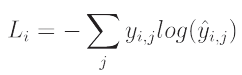

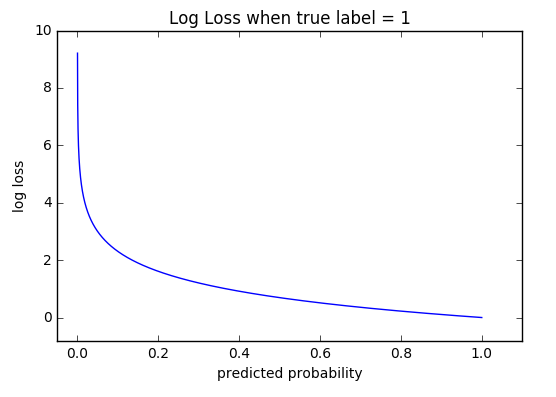

$y_{i,j}=$ The ground truth target values, the $i$-th sample in the set, $j$ -th label in the feature-set <br>
$\hat{y}_{i,j}=$ The predicted confidences feature coming from the last ***Softmax*** layer, the $i$-th sample in the feature-set, $j$ -th label in the set.

The output of $L_{i}$ is the Error of a given target class. if $L_{i} is:$<br>
* ***1***, then we have an Error of 0, meaning prediction $y_{i,j}$ matches ground truth $\hat{y}_{i,j}$
* ***0***, then we have an Error of 1, meaning prediction $y_{i,j}$, to a ***100%*** does ***NOT*** match ground truth $\hat{y}_{i,j}$

***!!!*** This can be ***confusing*** since the probability distribution from the ***Softmax*** algorithm before is mapped inversly, where 1 is confident, and 0 is not confide.t

$log$, inverts the relationship, in that high confidence from ***Softmax*** - namely ***1*** is ***0*** loss. <br>
* $log(0) = -\infty$ ERROR: therefore softmax never outputs a complete 0. Our ***biases > 0*** help in that too.
* $log(1) = 0$ we have no Loss (100% confident network)


The graph nicely displays that if softmax propbabilty for a label -  confidence is ~1 (close to 100) the Loss is close to 0, <br>
if the softmax probabilty for a label is 0, then the Loss is 100%

## Code Implementation

#### One-hot vectors

One-hot vectors represent are part of the ground-truth data or target data.<br>
Each row represents the ***target probability***. ***one-hot*** is called such, since only one sample of the class can be true. <br> therefore if we have ***n*** classes we will have a ***n*n*** matrix. The identity matrix can be used too ***identity matrix***

In contrast to ***one-hot*** vectors we can have a single output neuron that gives a ***0 or 1***

In [1]:
import numpy as np

In [2]:
# SOFTMAX PROBABILITIES (example)
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

# TARGETS (ground truth)
# for each class (row) another neuron is fired up (each row is a one-hot vector)
class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 0, 1]])

class_targets

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### Categorical Cross-Entropy Loss Class

In [3]:
class Loss:
    
    # parent class for all of our future Loss classes
    # will be updated in future chapters
    def calculate(self, output, y):
        
        sample_losses = self.forward(output, y)
        
        data_loss = np.mean(sample_losses)
        
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    
    # Forward pass
    def forward(self, y_pred, y_true):
        
        # nr of samples in a batch
        samples = len(y_pred)
        
        # clipping the data to keep it in bounds
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        #Probabilities for target values
        
        #only if we have categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),
                                                 y_true]
            
        # for hot-one vectors (dimension is larger than one)
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [4]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

1.191850256268978


#### Accuracy

While ***Loss*** is important to update our model, ***Accuracy*** expresses the loss in terms of a fraction. So therefore we can use the output of softmax to calculate the ***Accuracy***

In [11]:

# remember axis = 0 -> we compare each column
#          axis = 1 -> we compare each row
predictions = np.argmax(softmax_outputs, axis=1)

# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)

print('acc:', accuracy)

acc: 0.3333333333333333
